In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# making a path to get the modules from categorical library
import os
os.chdir('..')

In [5]:
from categorical.categorical_model import categorical_Model

In [6]:
categorical_Model.extractingZipFile("./DetectLungCancerUsingPatientDiagnosisData/lung_cancer.zip",'./DetectLungCancerUsingPatientDiagnosisData/')

In [7]:
df=pd.read_csv("./DetectLungCancerUsingPatientDiagnosisData/Lung Cancer/dataset_med.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


## EDA

## Following step by stem and analysing and cleaning columns
#### Step-1 : df["country] is not useful for model buiding so dropping it

In [8]:
df.drop(['country'],axis=1,inplace=True)
df.head()

,id,age,gender,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   cancer_stage        890000 non-null  object 
 5   family_history      890000 non-null  object 
 6   smoking_status      890000 non-null  object 
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  object 
 14  end_treatment_date  890000 non-null  object 
 15  survived            890000 non-nul

### Feature Engineering on the columns diagnosis_date and end_treatment_date

In [10]:
df["end_treatment_date"]=pd.to_datetime(df["end_treatment_date"])
df["diagnosis_date"]=pd.to_datetime(df["diagnosis_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  890000 non-null  int64         
 1   age                 890000 non-null  float64       
 2   gender              890000 non-null  object        
 3   diagnosis_date      890000 non-null  datetime64[ns]
 4   cancer_stage        890000 non-null  object        
 5   family_history      890000 non-null  object        
 6   smoking_status      890000 non-null  object        
 7   bmi                 890000 non-null  float64       
 8   cholesterol_level   890000 non-null  int64         
 9   hypertension        890000 non-null  int64         
 10  asthma              890000 non-null  int64         
 11  cirrhosis           890000 non-null  int64         
 12  other_cancer        890000 non-null  int64         
 13  treatment_type      890000 no

In [11]:
df["treatment_duration"]=df["end_treatment_date"]-df["diagnosis_date"]
df.head()

,id,age,gender,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
0,1,64.0,Male,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,523 days
1,2,50.0,Female,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,424 days
2,3,65.0,Female,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,370 days
3,4,51.0,Female,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,443 days
4,5,37.0,Male,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,406 days


### extracting days from the duration and making into a fraction of a year

In [12]:
df["treatment_duration"]=df["treatment_duration"].astype(str)
df["treatment_duration"]=df["treatment_duration"].str.extract(r"(\d+)").astype(int)
df.head()

,id,age,gender,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration
0,1,64.0,Male,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,523
1,2,50.0,Female,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,424
2,3,65.0,Female,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,370
3,4,51.0,Female,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,443
4,5,37.0,Male,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,406


In [13]:
df["treatment_duration_scaled"]=df["treatment_duration"]/(365.0)
df.head()

,id,age,gender,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,treatment_duration,treatment_duration_scaled
0,1,64.0,Male,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,523,1.432877
1,2,50.0,Female,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,424,1.161644
2,3,65.0,Female,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,370,1.013699
3,4,51.0,Female,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,443,1.213699
4,5,37.0,Male,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,406,1.112329


In [14]:
df.drop(["diagnosis_date","end_treatment_date","treatment_duration"],axis=1,inplace=True)
df.head()

,id,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_scaled
0,1,64.0,Male,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0,1.432877
1,2,50.0,Female,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1,1.161644
2,3,65.0,Female,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0,1.013699
3,4,51.0,Female,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0,1.213699
4,5,37.0,Male,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0,1.112329


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         890000 non-null  int64  
 1   age                        890000 non-null  float64
 2   gender                     890000 non-null  object 
 3   cancer_stage               890000 non-null  object 
 4   family_history             890000 non-null  object 
 5   smoking_status             890000 non-null  object 
 6   bmi                        890000 non-null  float64
 7   cholesterol_level          890000 non-null  int64  
 8   hypertension               890000 non-null  int64  
 9   asthma                     890000 non-null  int64  
 10  cirrhosis                  890000 non-null  int64  
 11  other_cancer               890000 non-null  int64  
 12  treatment_type             890000 non-null  object 
 13  survived                   89

In [16]:
def showingUnique(x):
    return x.unique()

In [17]:
c=list(df.columns)
for i in c:
    if df.dtypes[i]=='object':
        print(i,showingUnique(df[i]))

gender ['Male' 'Female']
cancer_stage ['Stage I' 'Stage III' 'Stage IV' 'Stage II']
family_history ['Yes' 'No']
smoking_status ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker']
treatment_type ['Chemotherapy' 'Surgery' 'Combined' 'Radiation']


### converting categorical columns to numerical

In [18]:
categorical_Model.checkCategoricalColumns(df)

Categorical columns: Index(['gender', 'cancer_stage', 'family_history', 'smoking_status',
       'treatment_type'],
      dtype='object')
col.unique(): ['Male' 'Female']
col.value_counts(): gender
Male      445134
Female    444866
Name: count, dtype: int64
col.unique(): ['Stage I' 'Stage III' 'Stage IV' 'Stage II']
col.value_counts(): cancer_stage
Stage III    222594
Stage IV     222527
Stage I      222516
Stage II     222363
Name: count, dtype: int64
col.unique(): ['Yes' 'No']
col.value_counts(): family_history
No     445181
Yes    444819
Name: count, dtype: int64
col.unique(): ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker']
col.value_counts(): smoking_status
Passive Smoker    223170
Never Smoked      222751
Former Smoker     222181
Current Smoker    221898
Name: count, dtype: int64
col.unique(): ['Chemotherapy' 'Surgery' 'Combined' 'Radiation']
col.value_counts(): treatment_type
Chemotherapy    223262
Surgery         223261
Combined        222609
Radiation       22

,id,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_scaled
0,1,64.0,1,0,1,3,29.4,199,0,0,1,0,0,0,1.432877
1,2,50.0,0,2,1,3,41.2,280,1,1,0,0,3,1,1.161644
2,3,65.0,0,2,1,1,44.0,268,1,1,0,0,1,0,1.013699
3,4,51.0,0,0,0,3,43.0,241,1,1,0,0,0,0,1.213699
4,5,37.0,1,0,0,3,19.7,178,0,0,0,0,1,0,1.112329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,3,0,3,44.8,243,1,1,1,0,2,0,0.649315
889996,889997,62.0,0,1,1,1,21.6,240,0,0,0,0,3,0,1.728767
889997,889998,48.0,0,2,1,2,38.6,242,1,0,0,0,1,1,0.827397
889998,889999,67.0,0,3,1,1,18.6,194,1,1,0,0,0,0,1.975342


#### Removing Id column

In [19]:
df.drop(["id"],axis=1,inplace=True)
df.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_scaled
0,64.0,1,0,1,3,29.4,199,0,0,1,0,0,0,1.432877
1,50.0,0,2,1,3,41.2,280,1,1,0,0,3,1,1.161644
2,65.0,0,2,1,1,44.0,268,1,1,0,0,1,0,1.013699
3,51.0,0,0,0,3,43.0,241,1,1,0,0,0,0,1.213699
4,37.0,1,0,0,3,19.7,178,0,0,0,0,1,0,1.112329


### Removing duplicates

In [20]:
categorical_Model.checkDuplicates(df)

Removed 1 duplicate rows.


,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_scaled
0,64.0,1,0,1,3,29.4,199,0,0,1,0,0,0,1.432877
1,50.0,0,2,1,3,41.2,280,1,1,0,0,3,1,1.161644
2,65.0,0,2,1,1,44.0,268,1,1,0,0,1,0,1.013699
3,51.0,0,0,0,3,43.0,241,1,1,0,0,0,0,1.213699
4,37.0,1,0,0,3,19.7,178,0,0,0,0,1,0,1.112329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,1,3,0,3,44.8,243,1,1,1,0,2,0,0.649315
889996,62.0,0,1,1,1,21.6,240,0,0,0,0,3,0,1.728767
889997,48.0,0,2,1,2,38.6,242,1,0,0,0,1,1,0.827397
889998,67.0,0,3,1,1,18.6,194,1,1,0,0,0,0,1.975342


### Removing missing values

In [21]:
# Checking missing values for each column
print(categorical_Model.missing_columns(df))

age                          0
gender                       0
cancer_stage                 0
family_history               0
smoking_status               0
bmi                          0
cholesterol_level            0
hypertension                 0
asthma                       0
cirrhosis                    0
other_cancer                 0
treatment_type               0
survived                     0
treatment_duration_scaled    0
dtype: int64


In [22]:
#checking missing values of all columns
print(categorical_Model.missing_columns_total(df))


0


In [23]:
df.dropna(inplace=True)

In [24]:
df.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_scaled
0,64.0,1,0,1,3,29.4,199,0,0,1,0,0,0,1.432877
1,50.0,0,2,1,3,41.2,280,1,1,0,0,3,1,1.161644
2,65.0,0,2,1,1,44.0,268,1,1,0,0,1,0,1.013699
3,51.0,0,0,0,3,43.0,241,1,1,0,0,0,0,1.213699
4,37.0,1,0,0,3,19.7,178,0,0,0,0,1,0,1.112329


In [25]:
from sklearn.preprocessing import MinMaxScaler
minMax=MinMaxScaler()
df["age_scaled"]=minMax.fit_transform(df[["age"]])
df["bmi_scaled"]=minMax.fit_transform(df[["bmi"]])
df["cholesterol_level_scaled"]=minMax.fit_transform(df[["cholesterol_level"]])
df.head()

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_scaled,age_scaled,bmi_scaled,cholesterol_level_scaled
0,64.0,1,0,1,3,29.4,199,0,0,1,0,0,0,1.432877,0.60,0.462069,0.326667
1,50.0,0,2,1,3,41.2,280,1,1,0,0,3,1,1.161644,0.46,0.868966,0.866667
2,65.0,0,2,1,1,44.0,268,1,1,0,0,1,0,1.013699,0.61,0.965517,0.786667
3,51.0,0,0,0,3,43.0,241,1,1,0,0,0,0,1.213699,0.47,0.931034,0.606667
4,37.0,1,0,0,3,19.7,178,0,0,0,0,1,0,1.112329,0.33,0.127586,0.186667


In [26]:
df.drop(["age","bmi","cholesterol_level"],axis=1,inplace=True)

Correlation matrix with respect to survived:
survived                     1.000000
cancer_stage                 0.002519
treatment_type               0.002354
cirrhosis                    0.001956
family_history               0.001322
age_scaled                   0.001233
gender                       0.000762
cholesterol_level_scaled     0.000157
smoking_status               0.000087
hypertension                 0.000059
bmi_scaled                   0.000007
treatment_duration_scaled   -0.000691
asthma                      -0.001809
other_cancer                -0.001972
Name: survived, dtype: float64


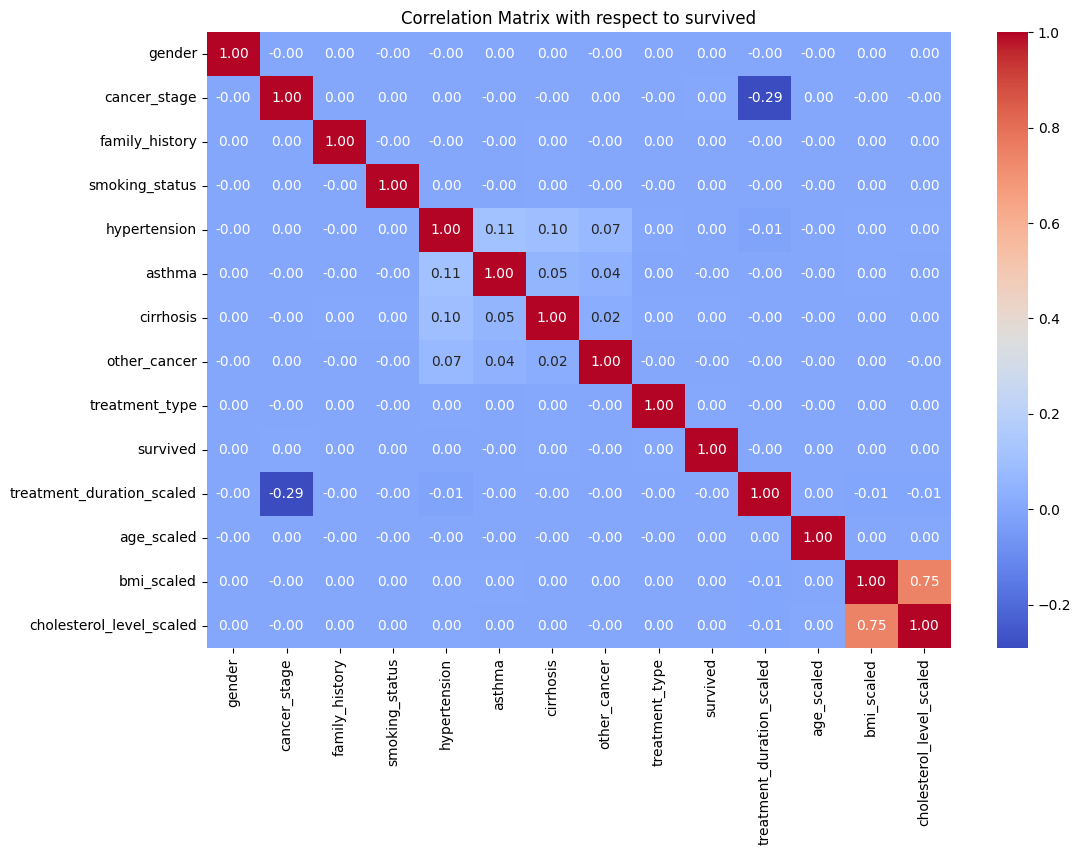

,gender,cancer_stage,family_history,smoking_status,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration_scaled,age_scaled,bmi_scaled,cholesterol_level_scaled
gender,1.000000,-0.000161,0.000762,-0.000595,-0.000254,0.001142,0.001092,-0.000545,0.000040,0.000762,-0.000734,-0.000945,0.000504,0.000224
cancer_stage,-0.000161,1.000000,0.000345,0.001160,0.000818,-0.001350,-0.000034,0.000260,-0.002192,0.002519,-0.291200,0.000875,-0.000446,-0.000504
family_history,0.000762,0.000345,1.000000,-0.001261,-0.001639,-0.000808,0.002495,-0.000024,0.000310,0.001322,-0.000600,-0.001111,0.000411,0.000086
smoking_status,-0.000595,0.001160,-0.001261,1.000000,0.000408,-0.000140,0.001454,-0.000579,-0.000910,0.000087,-0.001297,-0.000045,0.000901,0.001169
hypertension,-0.000254,0.000818,-0.001639,0.000408,1.000000,0.108201,0.097139,0.073651,0.001566,0.000059,-0.010732,-0.001082,0.001923,0.002049
asthma,0.001142,-0.001350,-0.000808,-0.000140,0.108201,1.000000,0.053147,0.039283,0.000734,-0.001809,-0.002795,-0.000519,0.001662,0.001263
cirrhosis,0.001092,-0.000034,0.002495,0.001454,0.097139,0.053147,1.000000,0.022671,0.001952,0.001956,-0.001821,-0.000067,0.000608,0.000467
other_cancer,-0.000545,0.000260,-0.000024,-0.000579,0.073651,0.039283,0.022671,1.000000,-0.001048,-0.001972,-0.001021,-0.000785,0.000771,-0.000185
treatment_type,0.000040,-0.002192,0.000310,-0.000910,0.001566,0.000734,0.001952,-0.001048,1.000000,0.002354,-0.001118,-0.001028,0.000783,0.000113
survived,0.000762,0.002519,0.001322,0.000087,0.000059,-0.001809,0.001956,-0.001972,0.002354,1.000000,-0.000691,0.001233,0.000007,0.000157


In [27]:
categorical_Model.printCorrelationMatrix(df,"survived")

In [28]:
X_train, X_test, y_train, y_test=categorical_Model.splitData(df,"survived")

In [29]:
categorical_Model.trainModel(X_train, X_test, y_train, y_test)

Logistic Regression Accuracy: 0.7789
Decision Tree Accuracy: 0.6411
Naive Bayes Accuracy: 0.7789
KNN Accuracy: 0.7377
XGBoost Accuracy: 0.7789
Best Model: LogisticRegressionCV with accuracy: 0.78
